In [2]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_4372\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [94]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [15]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()

target=data['target']
# data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)
column_name=[i for i in data.columns]


(12260, 167)
(12260,)


In [16]:
def Dispertion_Ratio(x):
    """Returns the Ratio of Arithmetic Mean and Geometric Mean. High value of this ratio indicates features with more importance"""

    AM = np.mean(x)
    GM = np.power(np.prod(x),1/len(x))
    ratio = AM/GM
    return ratio

In [17]:
def return_significant_rows(data):
    """Returns a numpy representation of the DataFrame with the most Significant Rows based on some statistical measures."""

    ###### 1
    # Rows are sorted on the basis of Dispersion Ratio.
    df = pd.DataFrame(data) # Data is loaded as Pandas DataFrame
    l = df.shape[1]
    ratio_list = [] # Empty List (Used to store the calculated ratios)
    rows_dict = {k: 0 for k in range(df.shape[0])} # Rows Dictionary is created with values set as 0

    for i in range(df.shape[0]):  # Loops over each row
        ratio_list.append(Dispertion_Ratio(abs(df.iloc[i,:-1].values))) # Dispersion Ratio calculated for each row
        rows_dict[i] = ratio_list[i] # Mapping of Row and Ratios

    sorted_rows_dict = dict(sorted(rows_dict.items(), key=lambda item: item[1])) # Row Dictionary is sorted on the basis of dict values.

    sorted_rows_list = list(sorted_rows_dict)    # Converted to list so as to access the rows 
    rng = int(0.15 * len(sorted_rows_list)) 
    return df.iloc[sorted(sorted_rows_list[rng:])].ewm(span=2).mean().values # Return the values Dataframe with significant rows and apply Exponential moving average with a window size of 5
    # return df.iloc[sorted(sorted_rows_list[rng:])].rolling(5).mean().values # Return the values Dataframe with significant rows and apply simple moving average with a window size of 5

In [18]:
data=return_significant_rows(data)
data=pd.DataFrame(data,columns=column_name)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [19]:
data.shape
data.head()

,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,6,7,8,9,10,11,12,13,14,target
0,0.321372,0.311293,0.468874,0.261605,0.232289,0.391229,0.452269,0.251313,0.222774,0.393711,...,-0.149889,1.276580,0.231540,0.154745,-0.000186,0.114142,0.076693,0.030472,0.125633,0.0
1,0.326376,0.322972,0.483393,0.313718,0.336336,0.514010,0.649317,0.239051,0.344137,0.577935,...,-0.207416,0.476021,0.238077,-0.129658,0.043949,0.084575,-0.001964,-0.042165,0.150403,0.0
2,0.321653,0.313644,0.472342,0.278532,0.265280,0.466091,0.564621,0.247640,0.268570,0.490763,...,-0.172816,0.926511,0.265712,0.047980,0.056400,0.131025,-0.000604,-0.010593,0.151002,0.0
3,0.320366,0.310965,0.468666,0.267701,0.249177,0.475301,0.557201,0.249488,0.261828,0.491435,...,-0.182352,0.903303,0.299350,0.101968,0.062330,0.139366,-0.002630,0.000141,0.158997,0.0
4,0.309187,0.301487,0.445986,0.251928,0.252469,0.418662,0.487937,0.247143,0.242610,0.425409,...,-0.181304,1.120946,0.371734,0.115116,0.015596,0.112403,0.073352,0.028218,0.142197,0.0


In [20]:
target=data['target']
data=data.drop(['target'],axis=1)
target.shape
data.head()
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10416    9.0
10417    9.0
10418    9.0
10419    9.0
10420    9.0
Name: target, Length: 10421, dtype: float64

In [21]:

target=target.astype(int)
target


0        0
1        0
2        0
3        0
4        0
        ..
10416    9
10417    9
10418    9
10419    9
10420    9
Name: target, Length: 10421, dtype: int32

In [22]:
from sklearn.ensemble import RandomForestClassifier
# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=342)

# fit the model to start training.

model.fit(data, target)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.

final_df = pd.DataFrame({"Features": pd.DataFrame(data).columns, "Importances":importances})
final_df.set_index("Importances")

# sort in ascending order to better visualization.
final_df =final_df.sort_values('Importances')
plt.figure(figsize=(30,25))

# plot the feature inportances in bars.
# final_df.plot.bar(color = 'teal')

<Figure size 3000x2500 with 0 Axes>

<Figure size 3000x2500 with 0 Axes>

                Features  Importances
78            dist_22_21     0.001338
73            dist_16_21     0.002037
98            dist_20_24     0.002198
77            dist_20_21     0.002373
6               dist_7_1     0.002389
..                   ...          ...
50             dist_6_11     0.013673
101   centroid_0_15_19_a     0.013737
122  centroid_19_16_15_a     0.013935
160                    9     0.014511
164                   13     0.017085

[166 rows x 2 columns]


([<matplotlib.axis.XTick at 0x1f1caf8fcd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

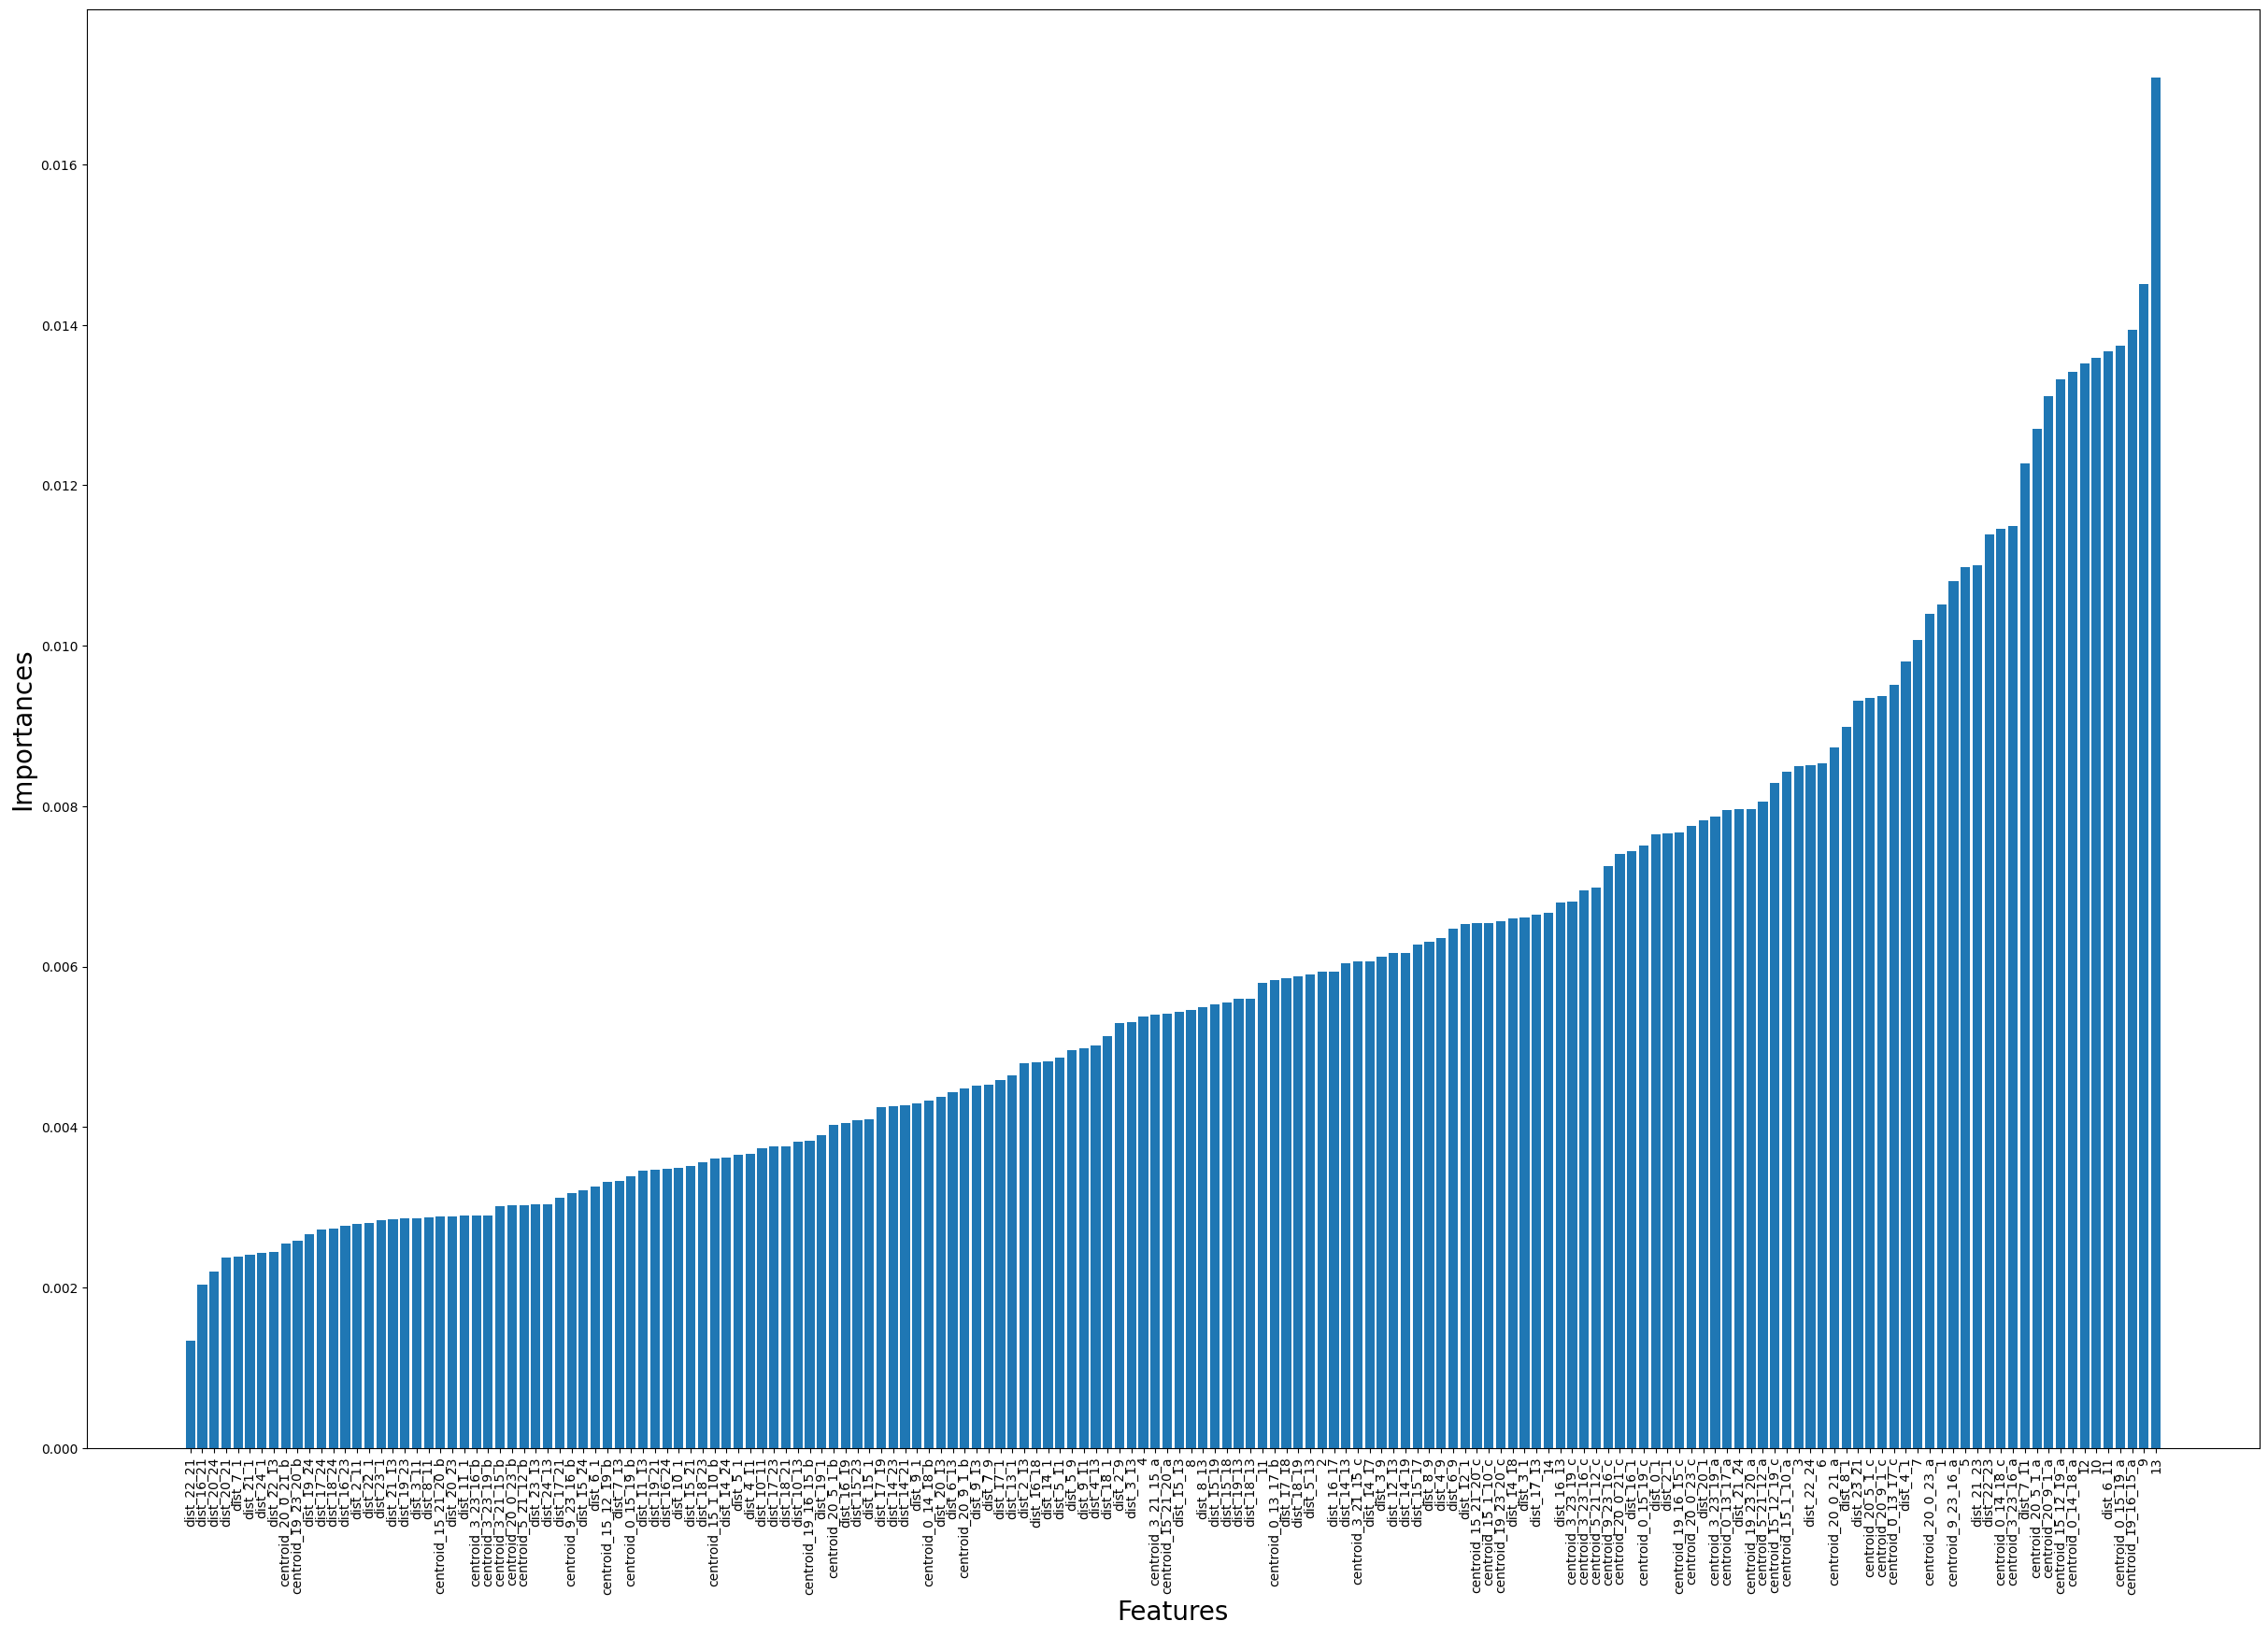

In [23]:
print(final_df)
plt.figure(figsize=(30,20))
plt.xlabel('Features',size=20)
plt.ylabel('Importances',size=20)
plt.bar(final_df['Features'],final_df['Importances'],label="Importance")
plt.xticks(final_df['Features'],rotation='vertical')

In [24]:
x=list(final_df['Features'])
y=list(final_df['Importances'])
y1=[]
x1=[]
sorted_id=[]
for i in range(-26,0):
    x[i]=str(x[i])
    sorted_id.append(x[i])
    y1.append(y[i])
x1=sorted_id

data=data[sorted_id] 
data.head()
data.columns

Index(['dist_23_21', 'centroid_20_5_1_c', 'centroid_20_9_1_c',
       'centroid_0_13_17_c', 'dist_4_1', '7', 'centroid_20_0_23_a', '1',
       'centroid_9_23_16_a', '5', 'dist_21_23', 'dist_22_23',
       'centroid_0_14_18_c', 'centroid_3_23_16_a', 'dist_7_11',
       'centroid_20_5_1_a', 'centroid_20_9_1_a', 'centroid_15_12_19_a',
       'centroid_0_14_18_a', '12', '10', 'dist_6_11', 'centroid_0_15_19_a',
       'centroid_19_16_15_a', '9', '13'],
      dtype='object')

([<matplotlib.axis.XTick at 0x1f1c85cd9c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

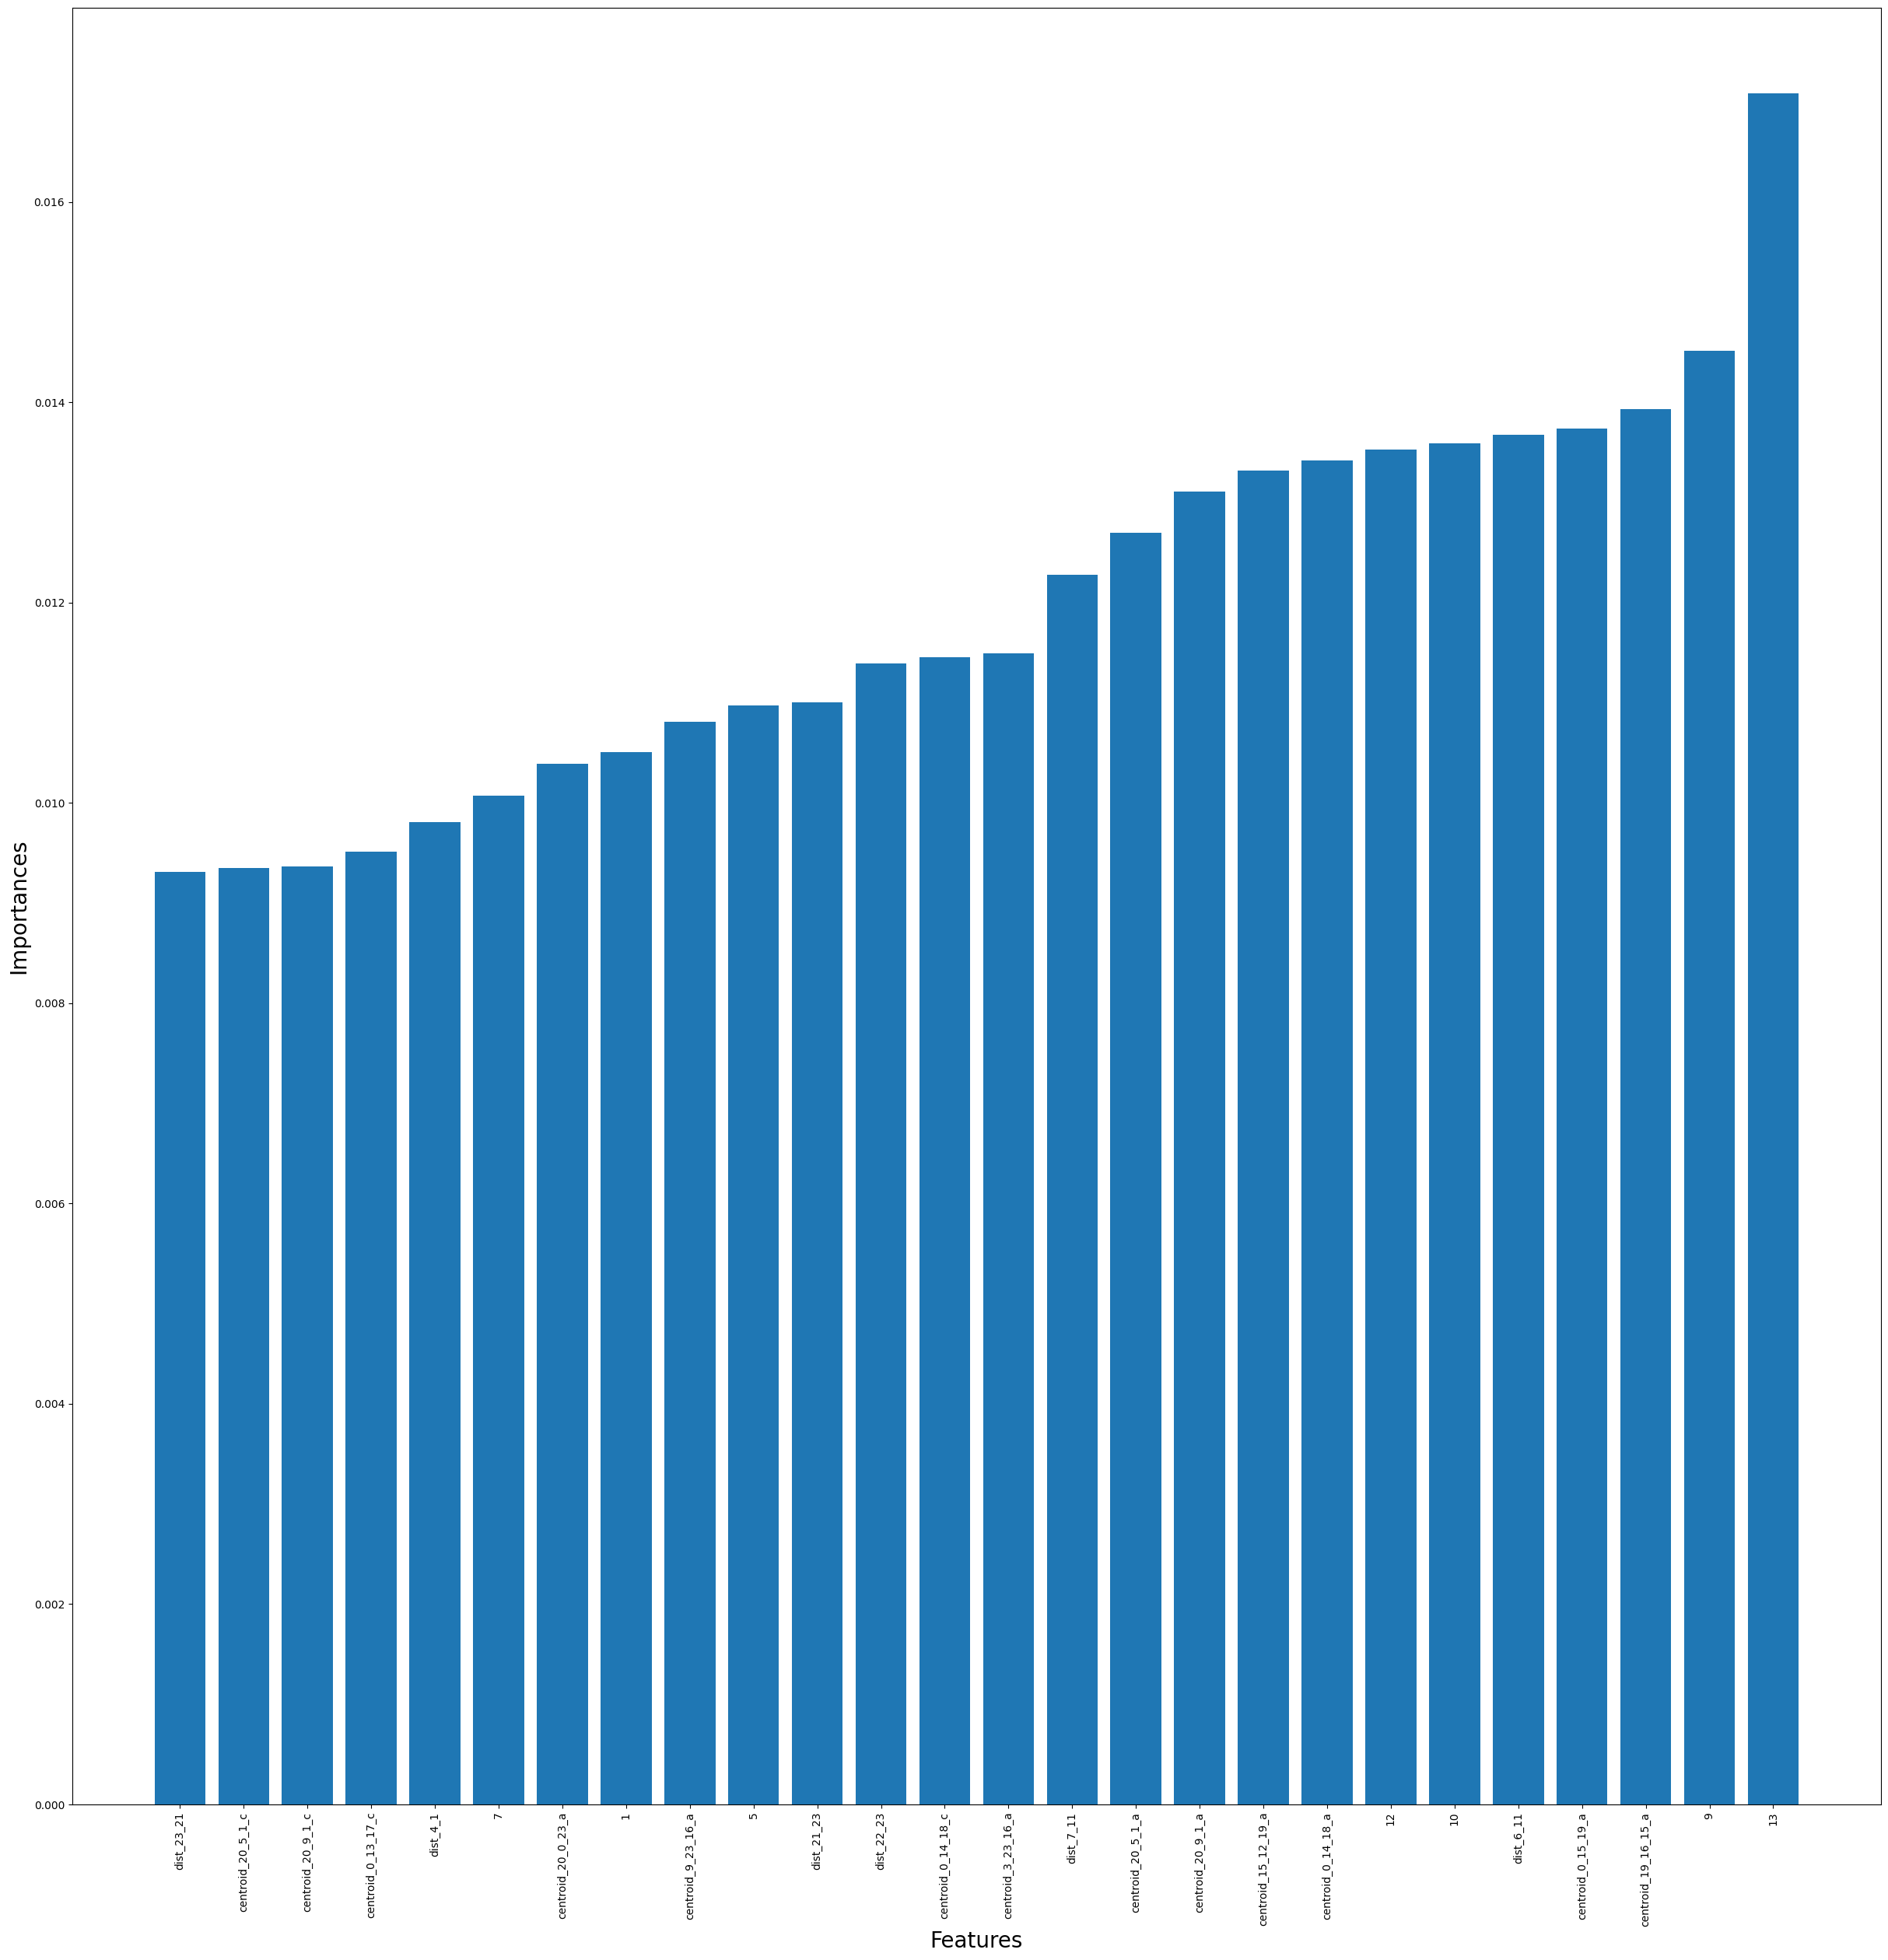

In [26]:
# print(final_df)
plt.figure(figsize=(30,30))
plt.xlabel('Features',size=20)
plt.ylabel('Importances',size=20)
plt.bar(x1,y1,label="Importance")
plt.xticks(x1,rotation='vertical')

In [25]:

data['target']=target
data.head()


,dist_23_21,centroid_20_5_1_c,centroid_20_9_1_c,centroid_0_13_17_c,dist_4_1,7,centroid_20_0_23_a,1,centroid_9_23_16_a,5,...,centroid_15_12_19_a,centroid_0_14_18_a,12,10,dist_6_11,centroid_0_15_19_a,centroid_19_16_15_a,9,13,target
0,0.409986,2.234533,2.228467,2.281100,0.261605,1.276580,0.451913,1.620111,0.544937,1.616926,...,0.351893,0.380817,0.076693,-0.000186,0.439705,0.379570,0.403033,0.154745,0.030472,0
1,0.321713,2.188908,2.182117,2.272125,0.313718,0.476021,0.480563,0.916077,0.562247,0.501748,...,0.362256,0.397634,-0.001964,0.043949,0.375262,0.390255,0.413873,-0.129658,-0.042165,0
2,0.384961,2.200303,2.191797,2.269315,0.278532,0.926511,0.478295,1.138526,0.563989,1.007149,...,0.361405,0.394707,-0.000604,0.056400,0.408911,0.389275,0.412715,0.047980,-0.010593,0
3,0.399396,2.198883,2.187794,2.267595,0.267701,0.903303,0.479689,1.130338,0.567551,1.055185,...,0.362151,0.395449,-0.002630,0.062330,0.417603,0.390080,0.413526,0.101968,0.000141,0
4,0.401495,2.513790,2.509701,2.555115,0.251928,1.120946,0.140279,1.517640,0.235189,1.483087,...,0.038898,0.065583,0.073352,0.015596,0.438728,0.064603,0.089279,0.115116,0.028218,0


In [73]:
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\dispersion_random_modified.csv",index=False)

In [74]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [76]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\dispersion_random_modified.csv")

data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)


(10421, 36)
(8332, 6, 26)
(8332, 10)
<class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             5056      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               6500

In [77]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[235   1   0   0   0   1   0   0   0   0]
 [  8 176   5   0   0   0   0   0   0   0]
 [  0   1 260   0   0   0   0   0   0   0]
 [  0   0   6 217   0   0   0   0   0   0]
 [  1   0   0   1 189   2   0   7   1   2]
 [  0   0   2   0   4 126  13   0   2   0]
 [  1   0   0   0   5   2 238   2   0   0]
 [  0   0   2   1   0   2   0 213   3   0]
 [  0   0   0   0   2   0   3   2 192   0]
 [  0   0   6   0   1   0   0   9   5 135]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       237
           1       0.99      0.93      0.96       189
           2       0.93      1.00      0.96       261
           3       0.99      0.97      0.98       223
           4       0.94      0.93      0.94       203
           5       0.95      0.86      0.90       147
           6       0.94      0.96      0.95       248
           7       0.91      0.96      0.94       221
           8       0.95      0.96      0.96       199
          

In [78]:

print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)




specificity:
0   0.9915611814345991
1   0.9312169312169312
2   0.9961685823754789
3   0.9730941704035875
4   0.9310344827586207
5   0.8571428571428571
6   0.9596774193548387
7   0.9638009049773756
8   0.964824120603015
9   0.8653846153846154
specificity avg
 0.943390526565192


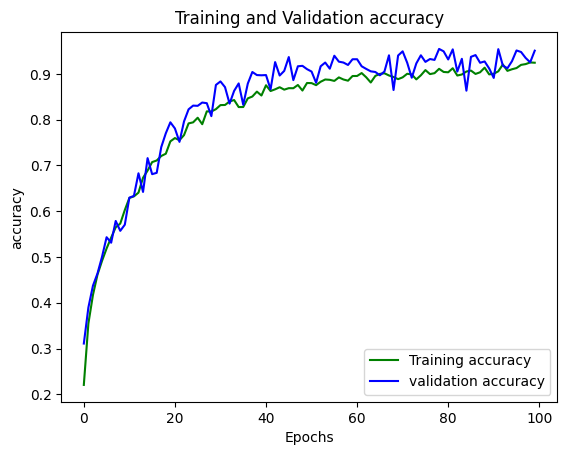

In [79]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

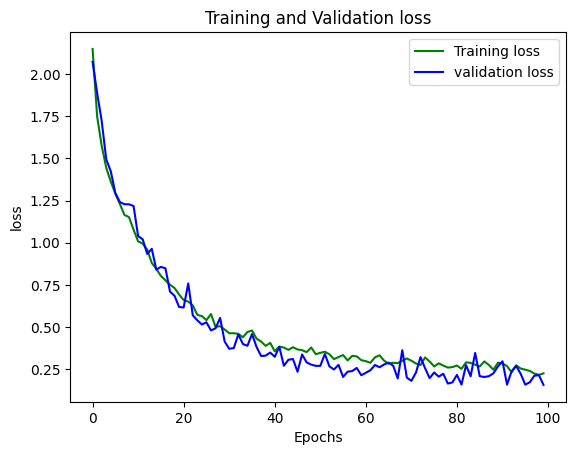

In [80]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()